# 1. Read csv file

In [1]:
import pandas as pd

# خواندن فایل CSV و ذخیره در df
df = pd.read_csv("D:/FILES/IMDBDataset.csv")

# نمایش چند سطر اول برای بررسی داده‌ها
print(df.head())


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


## Investigating Data

  sentiment  Count
1  negative  25000
0  positive  25000


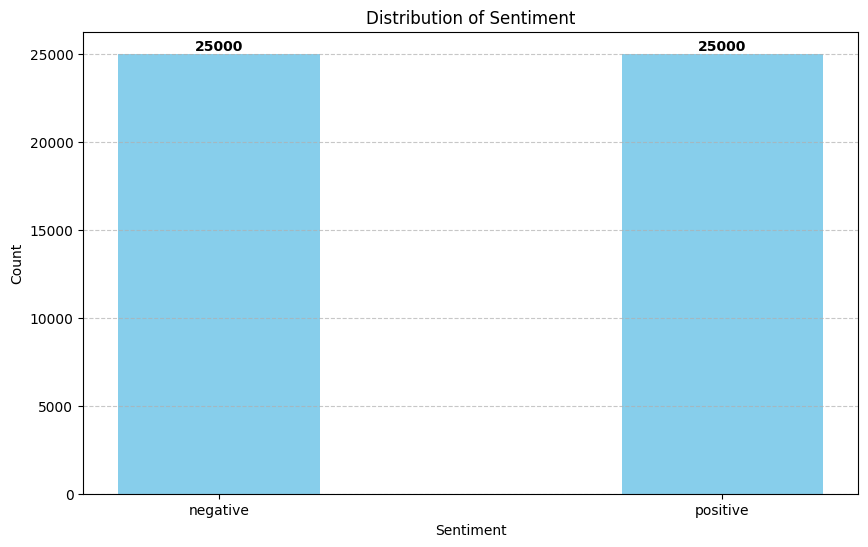

In [3]:
import matplotlib.pyplot as plt

# شمارش تعداد تکرار هر مقدار در ستون 'sentiment'
rating_counts = df['sentiment'].value_counts().reset_index()
rating_counts.columns = ['sentiment', 'Count']

# مرتب‌سازی بر اساس مقدار 'sentiment' (بدون تبدیل به عدد)
rating_counts = rating_counts.sort_values(by='sentiment')

# نمایش جدول تعداد تکرارها
print(rating_counts)

# رسم نمودار ستونی
plt.figure(figsize=(10, 6))
bars = plt.bar(rating_counts['sentiment'], rating_counts['Count'], color='skyblue', width=0.4)

# اضافه کردن مقدار تعداد بالای هر ستون
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=10, fontweight='bold')

# تنظیمات نمودار
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiment')
plt.xticks(rotation=0)  # چرخش برچسب‌ها برای خوانایی بهتر
plt.grid(axis='y', linestyle='--', alpha=0.7)

# نمایش نمودار
plt.show()


# 2. Preprocessing
## Text Cleaning

In [2]:
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# تابع برای حذف نویز (عددها، علائم نگارشی و فاصله‌های اضافی)
def clean_text(text):
    if isinstance(text, str):  # بررسی اینکه آیا ورودی از نوع رشته است
        # حذف عددها
        text = re.sub(r'\d+', '', text)
        # حذف علائم نگارشی
        text = re.sub(r'[^\w\s]', '', text)
        # حذف فاصله‌های اضافی
        text = re.sub(r'\s+', ' ', text).strip()
        # تبدیل متن به حروف کوچک
        text = text.lower()
        # حذف کلمات زائد (Stopwords)
        text = ' '.join([word for word in text.split() if word not in ENGLISH_STOP_WORDS])
    return text

# اعمال پاکسازی بر روی ستون 'Content'
df['review'] = df['review'].apply(clean_text)

# نمایش دیتافریم بعد از اعمال تغییرات
print(df.head())  # نمایش ۵ ردیف اول دیتافریم


                                              review sentiment
0  reviewers mentioned watching just oz episode y...  positive
1  wonderful little production br br filming tech...  positive
2  thought wonderful way spend time hot summer we...  positive
3  basically theres family little boy jake thinks...  negative
4  petter matteis love time money visually stunni...  positive


## Tokenize

In [3]:
import nltk
from nltk.tokenize import word_tokenize

# بارگذاری منابع لازم برای tokenization
nltk.download('punkt')

# تابع برای اعمال tokenization بر روی متن
def tokenize_text(text):
    if isinstance(text, str):  # بررسی اینکه آیا ورودی از نوع رشته است
        tokens = word_tokenize(text)  # انجام tokenization
        return tokens
    return []

# اعمال tokenization بر روی ستون 'Content'
df['review_Tokens'] = df['review'].apply(tokenize_text)

# نمایش دیتافریم بعد از اعمال tokenization
print(df[['review', 'review_Tokens']].head())


[nltk_data] Downloading package punkt to C:\Users\AFERI/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                              review  \
0  reviewers mentioned watching just oz episode y...   
1  wonderful little production br br filming tech...   
2  thought wonderful way spend time hot summer we...   
3  basically theres family little boy jake thinks...   
4  petter matteis love time money visually stunni...   

                                       review_Tokens  
0  [reviewers, mentioned, watching, just, oz, epi...  
1  [wonderful, little, production, br, br, filmin...  
2  [thought, wonderful, way, spend, time, hot, su...  
3  [basically, theres, family, little, boy, jake,...  
4  [petter, matteis, love, time, money, visually,...  


## n-grams

In [4]:
from nltk.util import ngrams

# تابع برای تشکیل n-gram
def generate_ngrams(tokens, n):
    return list(ngrams(tokens, n))

# اعمال Uni-gram (n=1) و Bi-gram (n=2) بر روی ستون 'Content_Tokens'
df['Uni-grams'] = df['review_Tokens'].apply(lambda tokens: generate_ngrams(tokens, 1))  # Uni-gram
df['Bi-grams'] = df['review_Tokens'].apply(lambda tokens: generate_ngrams(tokens, 2))  # Bi-gram

# نمایش دیتافریم بعد از اعمال n-grams
print(df[['review_Tokens', 'Uni-grams', 'Bi-grams']].head())


                                       review_Tokens  \
0  [reviewers, mentioned, watching, just, oz, epi...   
1  [wonderful, little, production, br, br, filmin...   
2  [thought, wonderful, way, spend, time, hot, su...   
3  [basically, theres, family, little, boy, jake,...   
4  [petter, matteis, love, time, money, visually,...   

                                           Uni-grams  \
0  [(reviewers,), (mentioned,), (watching,), (jus...   
1  [(wonderful,), (little,), (production,), (br,)...   
2  [(thought,), (wonderful,), (way,), (spend,), (...   
3  [(basically,), (theres,), (family,), (little,)...   
4  [(petter,), (matteis,), (love,), (time,), (mon...   

                                            Bi-grams  
0  [(reviewers, mentioned), (mentioned, watching)...  
1  [(wonderful, little), (little, production), (p...  
2  [(thought, wonderful), (wonderful, way), (way,...  
3  [(basically, theres), (theres, family), (famil...  
4  [(petter, matteis), (matteis, love), (love, ti..

# 3. Sentiment Analysis

## VADAR Using Content

VADAR

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\AFERI/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                              review  Positive_Score  \
0  reviewers mentioned watching just oz episode y...           0.111   
1  wonderful little production br br filming tech...           0.232   
2  thought wonderful way spend time hot summer we...           0.342   
3  basically theres family little boy jake thinks...           0.111   
4  petter matteis love time money visually stunni...           0.261   

   Negative_Score  Neutral_Score  Compound_Score  
0           0.311          0.578         -0.9928  
1           0.085          0.683          0.9153  
2           0.141          0.517          0.9666  
3           0.223          0.666         -0.9099  
4           0.033          0.706          0.9851  
                                              review  Positive_Score  \
0  reviewers mentioned watching just oz episode y...           0.111   
1  wonderful little production br br filming tech...           0.232   
2  thought wonderful way spend time hot summe

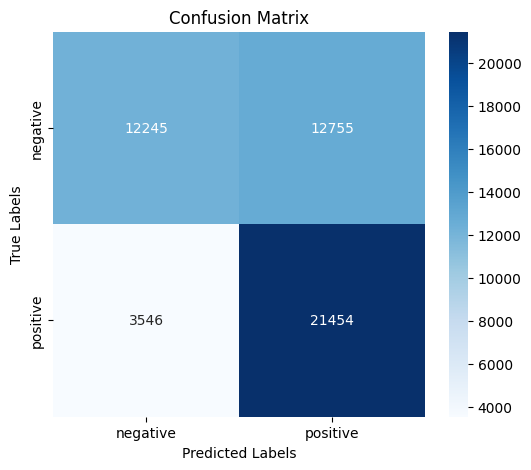

In [7]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
from rich.console import Console

console = Console()
console.print("[bold red]VADAR[/bold red]")

# بارگذاری مدل VADER
nltk.download('vader_lexicon')

# ایجاد یک شیء از SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# تابع برای انجام تحلیل احساس
def analyze_sentiment(text):
    if isinstance(text, str):
        # تحلیل احساس متن با استفاده از VADER
        sentiment_score = sia.polarity_scores(text)
        return sentiment_score
    return {}

# اعمال تحلیل احساس بر روی ستون 'Content'
df['vadar_sentiment'] = df['review'].apply(analyze_sentiment)

# استخراج نمرات مثبت، منفی و خنثی از نتایج تحلیل
df['Positive_Score'] = df['vadar_sentiment'].apply(lambda x: x.get('pos', 0))
df['Negative_Score'] = df['vadar_sentiment'].apply(lambda x: x.get('neg', 0))
df['Neutral_Score'] = df['vadar_sentiment'].apply(lambda x: x.get('neu', 0))
df['Compound_Score'] = df['vadar_sentiment'].apply(lambda x: x.get('compound', 0))

# نمایش دیتافریم بعد از تحلیل احساس
print(df[['review', 'Positive_Score', 'Negative_Score', 'Neutral_Score', 'Compound_Score']].head())

# اضافه کردن ستون 'VADER_SentimentAnalysis' بر اساس مقدار 'Compound_Score'
def get_vader_sentiment_analysis(compound_score):
    if compound_score < 0:
        return 'negative'
    elif compound_score >= 0:
        return 'positive'

df['VADER_SentimentAnalysis'] = df['Compound_Score'].apply(get_vader_sentiment_analysis)

# نمایش دیتافریم بعد از تحلیل احساس
print(df[['review', 'Positive_Score', 'Negative_Score', 'Neutral_Score', 'Compound_Score', 'VADER_SentimentAnalysis']].head())

#  تعریف کلاس‌ها
labels = ['negative', 'positive']

# محاسبه معیارهای ارزیابی مدل
accuracy = accuracy_score(df['sentiment'], df['VADER_SentimentAnalysis'])
recall = recall_score(df['sentiment'], df['VADER_SentimentAnalysis'], average='weighted')
f1 = f1_score(df['sentiment'], df['VADER_SentimentAnalysis'], average='weighted')

#  نمایش معیارها در قالب جدول
print("\n **Performance Metrics:**")
print(f"{'Metric':<12}{'Value':>8}")
print(f"{'-'*22}")
print(f"{'Accuracy':<12}{accuracy:.2f}")
print(f"{'Recall':<12}{recall:.2f}")
print(f"{'F1-Score':<12}{f1:.2f}")

#  محاسبه و نمایش ماتریس سردرگمی
conf_matrix = confusion_matrix(df['sentiment'], df['VADER_SentimentAnalysis'], labels=labels)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## TextBlob

TextBlob

                                              review  Polarity_Score_TextBlob  \
0  reviewers mentioned watching just oz episode y...                 0.025685   
1  wonderful little production br br filming tech...                 0.127604   
2  thought wonderful way spend time hot summer we...                 0.349048   
3  basically theres family little boy jake thinks...                -0.029688   
4  petter matteis love time money visually stunni...                 0.228697   

   Subjectivity_Score_TextBlob textblob_SentimentAnalysis  
0                     0.522282                   positive  
1                     0.567708                   positive  
2                     0.692381                   positive  
3                     0.475000                   negative  
4                     0.462848                   positive  
Accuracy: 0.71
Recall: 0.71
F1-score: 0.70


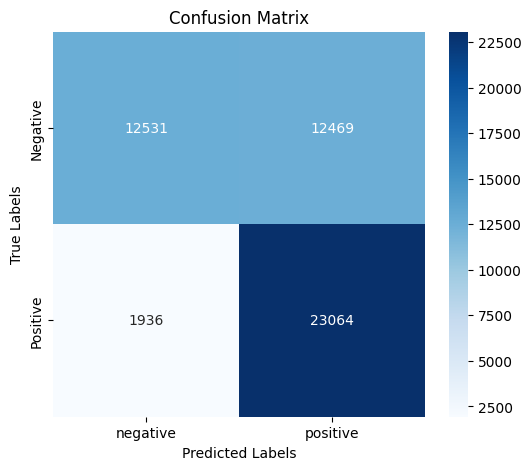

In [8]:
from textblob import TextBlob

console = Console()
console.print("[bold red]TextBlob[/bold red]")

# تابع برای انجام تحلیل احساس با TextBlob
def analyze_sentiment_textblob(text):
    if isinstance(text, str):
        # ایجاد یک شیء TextBlob برای تحلیل احساس
        blob = TextBlob(text)
        # محاسبه نمرات polarity و subjectivity
        return {'Polarity': blob.sentiment.polarity, 'Subjectivity': blob.sentiment.subjectivity}
    return {'Polarity': 0, 'Subjectivity': 0}

# اعمال تحلیل احساس با TextBlob بر روی ستون 'Content'
df['Sentiment_TextBlob'] = df['review'].apply(analyze_sentiment_textblob)

# استخراج نمرات Polarity و Subjectivity از نتایج تحلیل
df['Polarity_Score_TextBlob'] = df['Sentiment_TextBlob'].apply(lambda x: x.get('Polarity', 0))
df['Subjectivity_Score_TextBlob'] = df['Sentiment_TextBlob'].apply(lambda x: x.get('Subjectivity', 0))

# اضافه کردن ستون 'textblob_SentimentAnalysis' بر اساس مقدار 'Polarity_Score_TextBlob'
def get_textblob_sentiment_analysis(polarity_score):
    if polarity_score >= 0:
        return 'positive'
    elif polarity_score < 0:
        return 'negative'

df['textblob_SentimentAnalysis'] = df['Polarity_Score_TextBlob'].apply(get_textblob_sentiment_analysis)

# نمایش دیتافریم بعد از تحلیل احساس با TextBlob
print(df[['review', 'Polarity_Score_TextBlob', 'Subjectivity_Score_TextBlob', 'textblob_SentimentAnalysis']].head())

# محاسبه دقت (Accuracy)
accuracy = accuracy_score(df['sentiment'], df['textblob_SentimentAnalysis'])

# محاسبه Recall
recall = recall_score(df['sentiment'], df['textblob_SentimentAnalysis'], average='weighted')

# محاسبه F1-score
f1 = f1_score(df['sentiment'], df['textblob_SentimentAnalysis'], average='weighted')

# چاپ نتایج ارزیابی
print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# محاسبه ماتریس سردرگمی
conf_matrix = confusion_matrix(df['sentiment'], df['textblob_SentimentAnalysis'])

# رسم ماتریس سردرگمی
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=['negative', 'positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Logistic Regression 

Logistic Regression

Accuracy: 0.90
Recall: 0.90
F1-score: 0.90


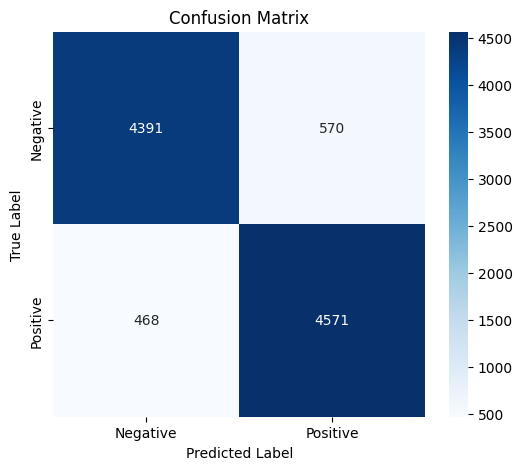

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

console = Console()
console.print("[bold red]Logistic Regression[/bold red]")

# اطمینان از عدم وجود مقادیر None یا NaN در ستون 'Content'
df['review'] = df['review'].fillna('')

# استخراج Uni-gram و Bi-gram با استفاده از CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1, 2))  # Uni-gram (1) و Bi-gram (2)

# استفاده از Uni-gram و Bi-gram 
X = df[['Uni-grams', 'Bi-grams']]

# تبدیل متن‌ها به ویژگی‌های عددی
X = vectorizer.fit_transform(df['review'])

# هدف (Sentiment_Class) از قبل ایجاد شده است
y = df['sentiment']

# تقسیم داده‌ها به داده‌های آموزشی و آزمایشی
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ساخت مدل رگرسیون لجیستیک
model = LogisticRegression()

# آموزش مدل
model.fit(X_train, y_train)

# پیش‌بینی بر روی داده‌های آزمایشی
y_pred = model.predict(X_test)

# ارزیابی مدل
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# چاپ نتایج ارزیابی
print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# نمایش ماتریس سردرگمی
conf_matrix = confusion_matrix(y_test, y_pred)

# ترسیم ماتریس سردرگمی
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## Naive Bayes

Naive Bayes

Accuracy: 0.88
Recall: 0.88
F1-score: 0.88


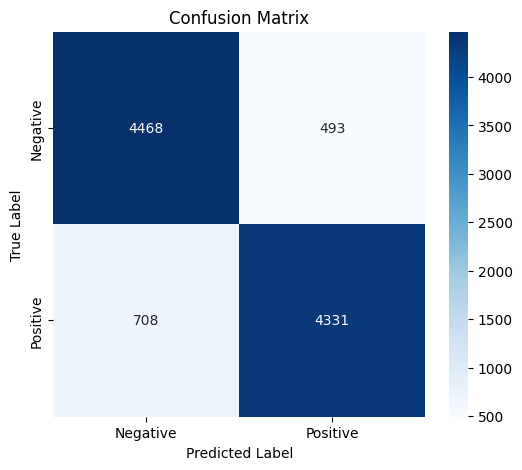

In [10]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

console = Console()
console.print("[bold red]Naive Bayes[/bold red]")

# اطمینان از عدم وجود مقادیر None یا NaN در ستون 'Content'
df['review'] = df['review'].fillna('')

# استفاده از Uni-gram و Bi-gram 
X = df[['Uni-grams', 'Bi-grams']]

# تبدیل متن‌ها به ویژگی‌های عددی
X = vectorizer.fit_transform(df['review'])

# هدف (Sentiment_Class) از قبل ایجاد شده است
y = df['sentiment']

# تقسیم داده‌ها به داده‌های آموزشی و آزمایشی
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ساخت مدل Naive Bayes
model = MultinomialNB()

# آموزش مدل
model.fit(X_train, y_train)

# پیش‌بینی بر روی داده‌های آزمایشی
y_pred = model.predict(X_test)

# ارزیابی مدل
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# چاپ نتایج ارزیابی
print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# نمایش ماتریس سردرگمی
conf_matrix = confusion_matrix(y_test, y_pred)

# ترسیم ماتریس سردرگمی
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## VADAR using Worc2Vec

VADAR using Worc2Vec

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\AFERI/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                              review VADER_SentimentAnalysis
0  reviewers mentioned watching just oz episode y...                negative
1  wonderful little production br br filming tech...                positive
2  thought wonderful way spend time hot summer we...                positive
3  basically theres family little boy jake thinks...                negative
4  petter matteis love time money visually stunni...                positive

 **Performance Metrics:**
Metric         Value
----------------------
Accuracy    0.67
Recall      0.67
F1-Score    0.66


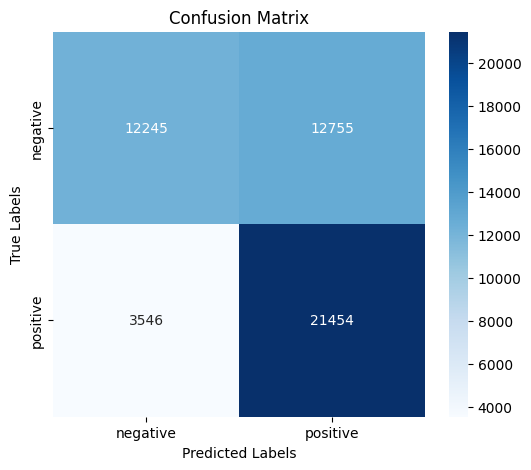

In [6]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
from rich.console import Console

console = Console()
console.print("[bold red]VADAR using Worc2Vec[/bold red]")

# بارگذاری داده‌ها و دانلود مدل VADER
nltk.download('vader_lexicon')

# ایجاد شیء تحلیل احساس VADER
sia = SentimentIntensityAnalyzer()

# تابع برای تحلیل احساس با استفاده از VADER
def analyze_sentiment(text):
    sentiment_score = sia.polarity_scores(text)
    if sentiment_score['compound'] >= 0:
        return 'positive'
    elif sentiment_score['compound'] < 0:
        return 'negative'
    

# اعمال تحلیل احساس بر روی ستون 'Content' 
df['VADER_SentimentAnalysis'] = df['review'].apply(analyze_sentiment)

# نمایش نتایج تحلیل احساس
print(df[['review', 'VADER_SentimentAnalysis']].head())

# تعریف برچسب‌های واقعی
labels = ['negative', 'positive']

# تبدیل برچسب‌ها به مقادیر عددی
label_mapping = {'negative': 0, 'positive': 1}
df['Label_Num'] = df['sentiment'].map(label_mapping)

# محاسبه معیارهای ارزیابی مدل
accuracy = accuracy_score(df['Label_Num'], df['VADER_SentimentAnalysis'].map(label_mapping))
recall = recall_score(df['Label_Num'], df['VADER_SentimentAnalysis'].map(label_mapping), average='weighted')
f1 = f1_score(df['Label_Num'], df['VADER_SentimentAnalysis'].map(label_mapping), average='weighted')

# نمایش معیارها در قالب جدول
print("\n **Performance Metrics:**")
print(f"{'Metric':<12}{'Value':>8}")
print(f"{'-'*22}")
print(f"{'Accuracy':<12}{accuracy:.2f}")
print(f"{'Recall':<12}{recall:.2f}")
print(f"{'F1-Score':<12}{f1:.2f}")

# محاسبه و نمایش ماتریس سردرگمی
conf_matrix = confusion_matrix(df['Label_Num'], df['VADER_SentimentAnalysis'].map(label_mapping), labels=[0, 1])

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


## Textblob using Word2Vec

TextBlob using Worc2Vec

                                              review  Polarity_Score_TextBlob  \
0  reviewers mentioned watching just oz episode y...                 0.025685   
1  wonderful little production br br filming tech...                 0.127604   
2  thought wonderful way spend time hot summer we...                 0.349048   
3  basically theres family little boy jake thinks...                -0.029688   
4  petter matteis love time money visually stunni...                 0.228697   

   Subjectivity_Score_TextBlob TextBlob_Word2Vec_SentimentAnalysis  
0                     0.522282                            positive  
1                     0.567708                            positive  
2                     0.692381                            positive  
3                     0.475000                            negative  
4                     0.462848                            positive  
Accuracy: 0.71
Recall: 0.71
F1-score: 0.70


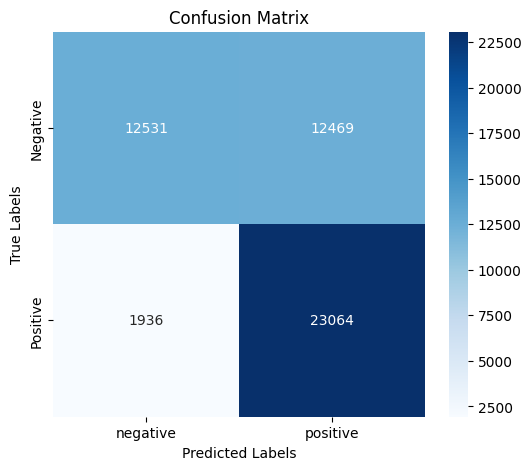

In [14]:
from textblob import TextBlob
from nltk.tokenize import word_tokenize
import numpy as np
import gensim
from gensim.models import Word2Vec
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix

console = Console()
console.print("[bold red]TextBlob using Worc2Vec[/bold red]")

# توکنایز کردن متن‌ها
sentences = df['review'].apply(word_tokenize)

# آموزش مدل Word2Vec
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# تابع برای استخراج میانگین بردارهای کلمات یک جمله
def get_sentence_vector(sentence, model):
    sentence_vector = np.zeros(100)  # فرض می‌کنیم بردارهای کلمات طول 100 دارند
    words = word_tokenize(sentence)
    word_count = 0
    for word in words:
        if word in model.wv:
            sentence_vector += model.wv[word]
            word_count += 1
    if word_count > 0:
        sentence_vector /= word_count  # میانگین بردارهای کلمات جمله
    return sentence_vector

# تابع برای انجام تحلیل احساس با TextBlob
def analyze_sentiment_textblob_with_word2vec(text, model):
    if isinstance(text, str):
        # استخراج بردار معنایی جمله از مدل Word2Vec
        sentence_vector = get_sentence_vector(text, model)
        
        # ایجاد یک شیء TextBlob برای تحلیل احساس
        blob = TextBlob(text)
        # محاسبه نمرات polarity و subjectivity
        sentiment = blob.sentiment
        return {
            'Polarity': sentiment.polarity,
            'Subjectivity': sentiment.subjectivity,
            'Sentence_Vector': sentence_vector
        }
    return {'Polarity': 0, 'Subjectivity': 0, 'Sentence_Vector': np.zeros(100)}

# اعمال تحلیل احساس با TextBlob بر روی ستون 'Content' همراه با Word2Vec
df['Sentiment_TextBlob_Word2Vec'] = df['review'].apply(lambda x: analyze_sentiment_textblob_with_word2vec(x, model))

# استخراج نمرات Polarity و Subjectivity از نتایج تحلیل
df['Polarity_Score_TextBlob'] = df['Sentiment_TextBlob_Word2Vec'].apply(lambda x: x.get('Polarity', 0))
df['Subjectivity_Score_TextBlob'] = df['Sentiment_TextBlob_Word2Vec'].apply(lambda x: x.get('Subjectivity', 0))

# اضافه کردن ستون 'TextBlob_Word2Vec_SentimentAnalysis' بر اساس مقدار 'Polarity_Score_TextBlob'
def get_textblob_sentiment_analysis(polarity_score):
    if polarity_score >= 0:
        return 'positive'
    elif polarity_score < 0:
        return 'negative'

df['TextBlob_Word2Vec_SentimentAnalysis'] = df['Polarity_Score_TextBlob'].apply(get_textblob_sentiment_analysis)

# نمایش دیتافریم بعد از تحلیل احساس با TextBlob و Word2Vec
print(df[['review', 'Polarity_Score_TextBlob', 'Subjectivity_Score_TextBlob', 'TextBlob_Word2Vec_SentimentAnalysis']].head())

# محاسبه دقت (Accuracy)
accuracy = accuracy_score(df['sentiment'], df['TextBlob_Word2Vec_SentimentAnalysis'])

# محاسبه Recall
recall = recall_score(df['sentiment'], df['TextBlob_Word2Vec_SentimentAnalysis'], average='weighted')

# محاسبه F1-score
f1 = f1_score(df['sentiment'], df['TextBlob_Word2Vec_SentimentAnalysis'], average='weighted')

# چاپ نتایج ارزیابی
print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# محاسبه ماتریس سردرگمی
conf_matrix = confusion_matrix(df['sentiment'], df['TextBlob_Word2Vec_SentimentAnalysis'])

# رسم ماتریس سردرگمی
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=['negative', 'positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
